/home/pmalonis/miniconda3/envs/pylds/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


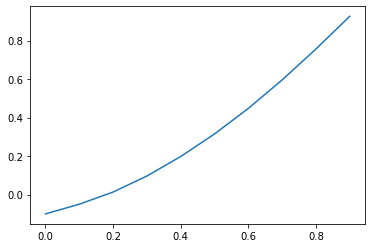

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
%matplotlib inline

sigmas = np.arange(0,1,.1)
eigen = np.zeros(len(sigmas))
t = np.arange(0,10,.01)
b1 = interp1d(np.arange(100.1,), np.random.randn(101),'cubic') 
b2 = interp1d(np.arange(100.1,), np.random.randn(101),'cubic') 
for i, sigma in enumerate(sigmas):
    def f(t, x):
        A = np.array([[-.1,1],[-2,-.1]]) + b1(t) * sigma
        return A.dot(x)
    
    s=solve_ivp(f,(0,t[-1]),[7,8],t_eval=t) 
    y_prime = np.gradient(s.y, t,axis=1)
    A,_,_,_ = np.linalg.lstsq(s.y, y_prime)
    eigen[i] = np.linalg.eig(A)[0][0].real
    
plt.plot(sigmas, eigen)